In [20]:
import pandas as pd

In [21]:
longbeach = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-03-04/longbeach.csv')


In [22]:
longbeach.head(10)

,animal_id,animal_name,animal_type,primary_color,secondary_color,sex,dob,intake_date,intake_condition,intake_type,...,outcome_date,crossing,jurisdiction,outcome_type,outcome_subtype,latitude,longitude,outcome_is_dead,was_outcome_alive,geopoint
0,A693708,*charlien,dog,white,NaN,Female,2013-02-21,2023-02-20,ill mild,stray,...,2023-02-26,"[2600 BLK LONG BEACH BLVD, LONG BEACH CA, 90806",Long Beach,euthanasia,ill severe,33.804794,-118.188926,True,False,"33.8047935, -118.1889261"
1,A708149,NaN,reptile,brown,green,Unknown,NaN,2023-10-03,normal,stray,...,2023-10-03,"`600 BLK E HARCOURT, LB 90805",Long Beach,rescue,other resc,33.867999,-118.200931,False,True,"33.8679994, -118.2009307"
2,A638068,NaN,bird,green,red,Unknown,NaN,2020-01-01,injured severe,wildlife,...,2020-01-01,"0 BLK GRAND AVE, LONG BEACH, CA 90803",Long Beach,euthanasia,inj severe,33.760478,-118.148091,True,False,"33.7604783, -118.1480912"
3,A639310,NaN,bird,white,gray,Unknown,NaN,2020-02-02,ill severe,wildlife,...,2020-02-02,"0 BLK TEMPLE AVE, LONG BEACH, CA 90803",Long Beach,transfer,lbah,33.762460,-118.159678,False,True,"33.7624598, -118.1596777"
4,A618968,*morgan,cat,black,white,Female,2014-12-18,2018-12-18,injured severe,stray,...,2019-01-13,"0 BLK W ZANE ST, LONG BEACH, CA 90805",Long Beach,rescue,littlelion,33.849501,-118.194905,False,True,"33.8495009, -118.1949053"
5,A730385,*brandon,rabbit,black,white,Neutered,2023-04-19,2024-10-18,normal,stray,...,2024-11-15,00 AQUARIUM WAY LONG BEACH CA 90802,Long Beach,adoption,web,33.763986,-118.194410,False,True,"33.7639859, -118.1944096"
6,A646202,NaN,bird,black,NaN,Unknown,NaN,2020-07-25,ill severe,wildlife,...,2020-07-25,"00 BLK CORONADO AVE, LONG BEACH, CA 90803",Long Beach,euthanasia,ill severe,33.761374,-118.154427,True,False,"33.7613739, -118.1544268"
7,A628138,NaN,other,gray,black,Unknown,2019-04-12,2019-06-12,under age/weight,wildlife,...,2019-06-12,"00 BLK CORONADO AVE, LONG BEACH, CA 90803",Long Beach,rescue,other resc,33.761374,-118.154427,False,True,"33.7613739, -118.1544268"
8,A597464,NaN,cat,black,NaN,Unknown,2017-08-21,2017-09-21,under age/weight,stray,...,2017-09-23,"00 BLK E 69TH WAY, LONG BEACH, CA 90805",Long Beach,rescue,littlelion,33.880115,-118.204430,False,True,"33.8801147, -118.20443"
9,A734321,sophie,dog,cream,NaN,Spayed,2007-12-15,2024-12-15,aged,owner surrender,...,2024-12-21,00 BLK PROSPECT AVE LONG BEACH CA 90803,Long Beach,rescue,NaN,33.758137,-118.142634,False,True,"33.758137, -118.142634"


In [75]:
filter1=longbeach['outcome_type']=='adoption'
filter2=longbeach['animal_type'].isin(['cat','dog'])


adopt=longbeach[filter1 & filter2]

In [78]:
adopt.loc['adoption_date']=pd.to_datetime(adopt['outcome_date'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10352\543486549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adopt.loc['adoption_date']=pd.to_datetime(adopt['outcome_date'])


In [79]:
adopt=adopt.drop(columns=['outcome_date'])

In [80]:
adopt['adoption_year']=adopt['adoption_date'].dt.year

In [81]:
adopt_gb=adopt.groupby(['adoption_year','animal_type'],as_index=False)['animal_id'].count()

In [52]:
adopt_gb.info()

<class 'pandas.core.series.Series'>
MultiIndex: 55 entries, (np.int32(2017), 'bird') to (np.int32(2024), 'reptile')
Series name: animal_id
Non-Null Count  Dtype
--------------  -----
55 non-null     int64
dtypes: int64(1)
memory usage: 752.0+ bytes


In [82]:
import seaborn as sns

In [83]:
import matplotlib.pyplot as plt

In [88]:
adopt_gb['adoption_year']=adopt_gb['adoption_year'].astype('int32')

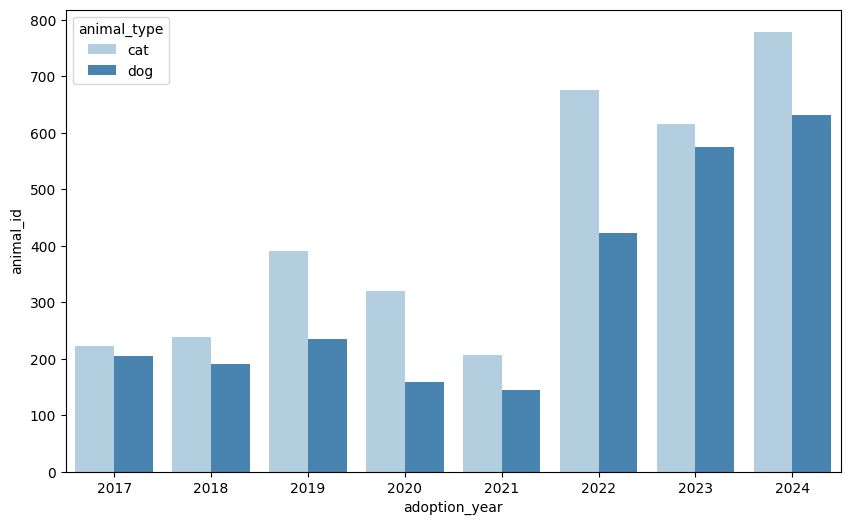

In [97]:
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data=adopt_gb,x='adoption_year',y='animal_id',errorbar=None,hue='animal_type',palette='Blues')
#sns.lineplot(data=adopt_gb,x='adoption_year',y='animal_id',errorbar=None,hue='animal_type',palette='Blues')

plt.show()

In [104]:
adopt_gb=adopt_gb.sort_values(by=['animal_type','adoption_year'])

In [115]:
adopt_gb['change']=adopt_gb.groupby('animal_type')['animal_id'].pct_change().fillna(0).round(2)

In [ ]:
adopt_gb['change']

,adoption_year,animal_type,animal_id,change
0,2017,cat,222,0.00
2,2018,cat,238,0.07
4,2019,cat,391,0.64
6,2020,cat,320,-0.18
8,2021,cat,207,-0.35
10,2022,cat,675,2.26
12,2023,cat,616,-0.09
14,2024,cat,779,0.26
1,2017,dog,205,0.00
3,2018,dog,191,-0.07


In [116]:
# Format 'change' as a percentage string without the decimal part
adopt_gb['change'] = adopt_gb['change'].apply(lambda x: f"{int(x * 100)}%")

# Display the modified 'change' column
adopt_gb['change']

0       0%
2       7%
4      64%
6     -18%
8     -35%
10    225%
12     -9%
14     26%
1       0%
3      -7%
5      23%
7     -32%
9      -8%
11    191%
13     36%
15     10%
Name: change, dtype: object

In [117]:
adopt_gb

,adoption_year,animal_type,animal_id,change
0,2017,cat,222,0%
2,2018,cat,238,7%
4,2019,cat,391,64%
6,2020,cat,320,-18%
8,2021,cat,207,-35%
10,2022,cat,675,225%
12,2023,cat,616,-9%
14,2024,cat,779,26%
1,2017,dog,205,0%
3,2018,dog,191,-7%


In [118]:
filter1=longbeach['animal_type']=='dog'
filter2=longbeach['outcome_type']=='adoption'

dogs_a=longbeach[filter1 & filter2]



In [ ]:
dogs_a['dob']=pd.to_datetime(dogs_a['dob'])

In [120]:
dogs_a['intake_date']=pd.to_datetime(dogs_a['intake_date'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10352\3766333532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogs_a['intake_date']=pd.to_datetime(dogs_a['intake_date'])


In [122]:
dogs_a['outcome_date']=pd.to_datetime(dogs_a['outcome_date'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10352\3181752508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogs_a['outcome_date']=pd.to_datetime(dogs_a['outcome_date'])


In [142]:
dogs_a['age_in']=dogs_a['intake_date']-dogs_a['dob']

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10352\1096433432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogs_a['age_in']=dogs_a['intake_date']-dogs_a['dob']


In [124]:
dogs_a.columns

Index(['animal_id', 'animal_name', 'animal_type', 'primary_color',
       'secondary_color', 'sex', 'dob', 'intake_date', 'intake_condition',
       'intake_type', 'intake_subtype', 'reason_for_intake', 'outcome_date',
       'crossing', 'jurisdiction', 'outcome_type', 'outcome_subtype',
       'latitude', 'longitude', 'outcome_is_dead', 'was_outcome_alive',
       'geopoint', 'age_in'],
      dtype='object')

In [125]:
dogs_a

,animal_id,animal_name,animal_type,primary_color,secondary_color,sex,dob,intake_date,intake_condition,intake_type,...,crossing,jurisdiction,outcome_type,outcome_subtype,latitude,longitude,outcome_is_dead,was_outcome_alive,geopoint,age_in
22,A718171,*hanley,dog,white,gray,Neutered,2023-04-06,2024-04-06,normal,stray,...,"00 BLOCK W 51ST ST, LONG BEACH CA",Long Beach,adoption,web,33.848795,-118.194645,False,True,"33.8487953, -118.1946447",366 days
37,A664040,*cupcake,dog,gray,white,Spayed,2020-09-18,2021-09-18,normal,stray,...,"10 BLK E 55TH ST, LONG BEACH, CA 90805",Long Beach,adoption,web,33.855747,-118.196906,False,True,"33.8557475, -118.1969063",365 days
43,A677069,*lito,dog,brown,black,Neutered,NaT,2022-06-08,normal,stray,...,"10 BLK W BORT ST, LONG BEACH, CA 90805",Long Beach,adoption,NaN,33.870346,-118.202016,False,True,"33.8703458, -118.2020155",NaT
53,A708530,*max,dog,black,tan,Neutered,2021-10-10,2023-10-08,normal,stray,...,"100 AQUARIUM WAY, LONG BEACH, CA 90802",Long Beach,adoption,web,33.762168,-118.196966,False,True,"33.7621679, -118.196966",728 days
63,A680169,*ophelia,dog,gray,white,Spayed,2017-07-18,2022-07-18,aged,stray,...,"100 BLK 68TH ST, LONG BEACH, CA 90805",Long Beach,adoption,remote evt,33.877518,-118.202553,False,True,"33.8775178, -118.2025528",1826 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29712,A614360,leo,dog,white,tan,Neutered,2016-09-11,2018-09-09,normal,stray,...,"W 27TH ST / MAINE AVE, LONG BEACH, CA 90806",Long Beach,adoption,walkin,33.806226,-118.200231,False,True,"33.8062259, -118.200231",728 days
29714,A602971,haku,dog,white,NaN,Male,2015-01-23,2018-01-23,ill mild,stray,...,"W 28TH ST / MAGNOLIA AVE, LONG BEACH, CA 90806",Long Beach,adoption,good sam,33.808004,-118.198071,False,True,"33.8080039, -118.1980708",1096 days
29726,A616799,*regina,dog,gray,tricolor,Spayed,2014-10-28,2018-10-28,normal,stray,...,"W 4TH ST / MAGNOLIA AVE, LONG BEACH, CA 90802",Long Beach,adoption,walkin,33.771714,-118.198048,False,True,"33.7717141, -118.1980478",1461 days
29749,A613730,NaN,dog,brown,NaN,Female,2003-08-27,2018-08-27,aged,stray,...,"W SPRING ST / MAINE AVE, LONG BEACH, CA 90806",Long Beach,adoption,walkin,33.811607,-118.200226,False,True,"33.8116071, -118.2002265",5479 days


In [143]:
dogs_a['age_in']

22       366 days
37       365 days
43            NaT
53       728 days
63      1826 days
           ...   
29712    728 days
29714   1096 days
29726   1461 days
29749   5479 days
29784   1826 days
Name: age_in, Length: 2562, dtype: timedelta64[ns]

In [144]:
dogs_a['in_shelter']=dogs_a['outcome_date']-dogs_a['intake_date']

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10352\3557520851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogs_a['in_shelter']=dogs_a['outcome_date']-dogs_a['intake_date']


In [147]:
dogs_a=dogs_a.dropna(subset=['age_in'])

In [153]:
# Assuming 'dogs_a' DataFrame has 'age_in' and 'in_shelter' columns as timedelta

dogs_a['age_in_years'] = (dogs_a['age_in'].dt.days).astype(int)
dogs_a['in_shelter_years'] = (dogs_a['in_shelter'].dt.days).astype(int)

# Display the modified DataFrame
dogs_a[['age_in_years', 'in_shelter_years']]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10352\2936838078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogs_a['age_in_years'] = (dogs_a['age_in'].dt.days).astype(int)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10352\2936838078.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogs_a['in_shelter_years'] = (dogs_a['in_shelter'].dt.days).astype(int)


,age_in_years,in_shelter_years
22,366,6
37,365,14
53,728,154
63,1826,264
94,335,18
...,...,...
29712,728,17
29714,1096,3
29726,1461,53
29749,5479,6


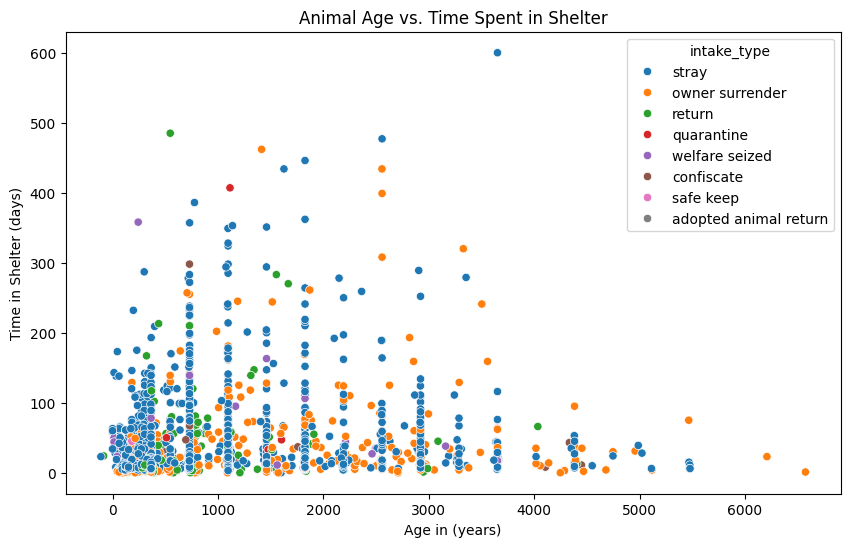

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'adopt' DataFrame has 'age_in' and 'in_shelter' columns
fig,ax=plt.subplots(figsize=(10,6))



sns.scatterplot(data=dogs_a, x='age_in_years', y='in_shelter_years',hue='intake_type',palette='tab10')





plt.title('Animal Age vs. Time Spent in Shelter')
plt.xlabel('Age in (years)')
plt.ylabel('Time in Shelter (days)')
plt.show()